<a href="https://colab.research.google.com/github/kevin-rego/Exploratory-Data-Analysis/blob/main/29march_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/yearly-water-usage.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    79 non-null     int64
 1   Water   79 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


In [ ]:
df.index = df.Year
df = df.drop("Year",axis=1)


In [ ]:
from statsmodels.tsa.stattools import adfuller

# check_adfuller
def cal_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts) # Augmented Dicky Fuller Test
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    # result[2] -> usedlag , the number of lags used
    # result[3] -> nobs, The number of observations used for the regression and calculation of the critical values.
    print('Critical Values:' ,result[4])

In [ ]:
adfuller(df)

(-2.077087450405188,
 0.2538270887941583,
 2,
 76,
 {'1%': -3.5194805351545413,
  '5%': -2.9003945086747343,
  '10%': -2.5874984279778395},
 622.4874229514137)

In [ ]:
df

,Water
Year,
1885,356
1886,386
1887,397
1888,397
1889,413
...,...
1959,594
1960,587
1961,587


In [ ]:
split_point = len(df) - 10
dataset, validation = df[0:split_point], df[split_point:]

In [ ]:
# prepare data. spliting into train and test set
X = df.values
X = X.astype('float32')
# Always convert a loaded dataset to float32 in case the loaded data 
# still has some String or Integer data types.

train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1] # using the last i.e 69th record to predict 70th record
	predictions.append(yhat)

    # observation
	obs = test[i]
	history.append(obs)
	print('>Predicted= ' ,yhat, 'Expected= ', obs)

>Predicted=  [492.] Expected=  [503.]
>Predicted=  [503.] Expected=  [503.]
>Predicted=  [503.] Expected=  [450.]
>Predicted=  [450.] Expected=  [432.]
>Predicted=  [432.] Expected=  [432.]
>Predicted=  [432.] Expected=  [458.]
>Predicted=  [458.] Expected=  [462.]
>Predicted=  [462.] Expected=  [503.]
>Predicted=  [503.] Expected=  [488.]
>Predicted=  [488.] Expected=  [466.]
>Predicted=  [466.] Expected=  [492.]
>Predicted=  [492.] Expected=  [503.]
>Predicted=  [503.] Expected=  [515.]
>Predicted=  [515.] Expected=  [500.]
>Predicted=  [500.] Expected=  [522.]
>Predicted=  [522.] Expected=  [575.]
>Predicted=  [575.] Expected=  [583.]
>Predicted=  [583.] Expected=  [587.]
>Predicted=  [587.] Expected=  [628.]
>Predicted=  [628.] Expected=  [640.]
>Predicted=  [640.] Expected=  [609.]
>Predicted=  [609.] Expected=  [606.]
>Predicted=  [606.] Expected=  [632.]
>Predicted=  [632.] Expected=  [617.]
>Predicted=  [617.] Expected=  [613.]
>Predicted=  [613.] Expected=  [598.]
>Predicted= 

In [ ]:
series = pd.read_csv('/content/yearly-water-usage.csv', parse_dates=[0], index_col=['Year'], header=0)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot


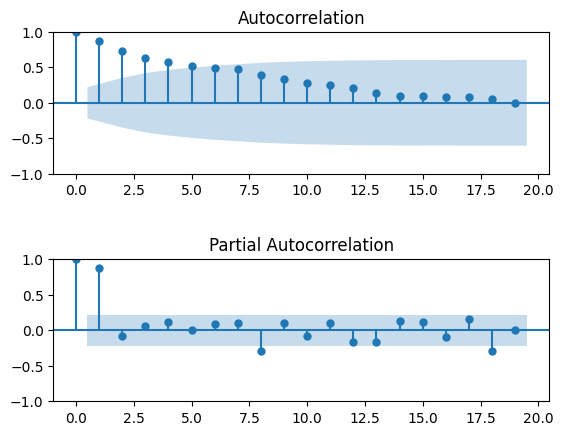

In [ ]:
fig = pyplot.figure()
fig.subplots_adjust(hspace=0.6)
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca()) # gca -> "GetCurrentAxis"
# Plots lags on the horizontal and the correlations on vertical axis.

pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show();

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

# load data
series = read_csv('/content/yearly-water-usage.csv', header=0, index_col=0)

# prepare data
X = series.values
X = X.astype('float32')

train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit() 
    # By default, disp parameter is set to 1, which shows convergence output.
    # Set disp to 0, because it is critical in removing all of the convergence output when evaluating the ARIMA model using walk-forward validation.
    # Setting it to False turns off all of this noise i.e extra unwanted o/p.
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=492.000, Expected=503
>Predicted=503.000, Expected=503
>Predicted=503.000, Expected=450
>Predicted=450.000, Expected=432
>Predicted=432.000, Expected=432
>Predicted=432.000, Expected=458
>Predicted=458.000, Expected=462
>Predicted=462.000, Expected=503
>Predicted=503.000, Expected=488
>Predicted=488.000, Expected=466
>Predicted=466.000, Expected=492
>Predicted=492.000, Expected=503
>Predicted=503.000, Expected=515
>Predicted=515.000, Expected=500
>Predicted=500.000, Expected=522
>Predicted=522.000, Expected=575
>Predicted=575.000, Expected=583
>Predicted=583.000, Expected=587
>Predicted=587.000, Expected=628
>Predicted=628.000, Expected=640
>Predicted=640.000, Expected=609
>Predicted=609.000, Expected=606
>Predicted=606.000, Expected=632
>Predicted=632.000, Expected=617
>Predicted=617.000, Expected=613
>Predicted=613.000, Expected=598
>Predicted=598.000, Expected=575
>Predicted=575.000, Expected=564
>Predicted=564.000, Expected=549
>Predicted=549.000, Expected=538
>Predicted